## Dataset Source

https://www.kaggle.com/datasets/talhabu/us-regional-sales-data/data

This dataset provides comprehensive insights into US regional sales data across different sales channels, including In-Store, Online, Distributor, and Wholesale. With a total of 17,992 rows and 15 columns, this dataset encompasses a wide range of information, from order and product details to sales performance metrics. It offers a comprehensive overview of sales transactions and customer interactions, enabling deep analysis of sales patterns, trends, and potential opportunities.

##Columns in the dataset:

OrderNumber: A unique identifier for each order. \
Sales Channel: The channel through which the sale was made (In-Store, Online, Distributor, Wholesale). \
WarehouseCode: Code representing the warehouse involved in the order. \
ProcuredDate: Date when the products were procured. \
OrderDate: Date when the order was placed. \
ShipDate: Date when the order was shipped. \
DeliveryDate: Date when the order was delivered. \
SalesTeamID: Identifier for the sales team involved. \
CustomerID: Identifier for the customer. \
StoreID: Identifier for the store. \
ProductID: Identifier for the product. \
Order Quantity: Quantity of products ordered. \
Discount Applied: Applied discount for the order. \
Unit Cost: Cost of a single unit of the product. \
Unit Price: Price at which the product was sold. \
This dataset serves as a valuable resource for analysing sales trends, identifying popular products, assessing the performance of different sales channels, and optimising pricing strategies for different regions.

In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/US_Regional_Sales_Data.csv')
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
7987,SO - 0008088,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,SO - 0008089,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,SO - 0008090,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,"1,072.00"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

#We see, that our data needs a bit of cleaning and type conversions, Below i'll modify the dataframe such that it suitable for Machine Learning ✌

In [ ]:
#Converting certain columns into numericals (Since the ML model computes effectively with numbers)

df['ProcuredDate'] = df['ProcuredDate'].str.replace('[/-]', '', regex=True).astype(np.int64)
df['OrderDate'] = df['OrderDate'].str.replace('[/-]', '', regex=True).astype(np.int64)
df['ShipDate'] = df['ShipDate'].str.replace('[/-]', '', regex=True).astype(np.int64)
df['DeliveryDate'] = df['DeliveryDate'].str.replace('[/-]', '', regex=True).astype(np.int64)

In [ ]:
# Observe these columns after the above modification
df[['ProcuredDate','OrderDate','ShipDate','DeliveryDate']].head(10)

,ProcuredDate,OrderDate,ShipDate,DeliveryDate
0,311217,31518,14618,19618
1,311217,31518,22618,2718
2,311217,31518,21618,1718
3,311217,31518,2618,7618
4,10418,31518,16618,26618
5,311217,31518,8618,13618
6,311217,31518,8618,14618
7,10418,31518,26618,1718
8,311217,1618,16618,21618
9,311217,1618,29618,1718


In [ ]:
#If you observe the 'Unit Cost' and 'Unit Price' columns, you'll find 'comma' in-between the numbers
#python recognizes this as a string or object (meaning we can't add or substract as they are not treated as numbers!)
print(df['Unit Cost'][0])
print(type(df['Unit Cost'][0]))

1,001.18
<class 'str'>


In [ ]:
#Removing the commas from each number in the entire columns AND converting the numbers into numeric type


#Removing commas!
df['Unit Cost'] = df['Unit Cost'].str.replace(',', '')
df['Unit Price'] = df['Unit Price'].str.replace(',', '')

#Type convertion
df['Unit Cost'] = pd.to_numeric( df['Unit Cost'] )
df['Unit Price'] = pd.to_numeric(df['Unit Price'] )


#see it for yourself
print(df['Unit Cost'][0])
print(type(df['Unit Cost'][0]))

1001.18
<class 'numpy.float64'>


In [ ]:

df['Sales Channel'].unique()

array(['In-Store', 'Online', 'Distributor', 'Wholesale'], dtype=object)

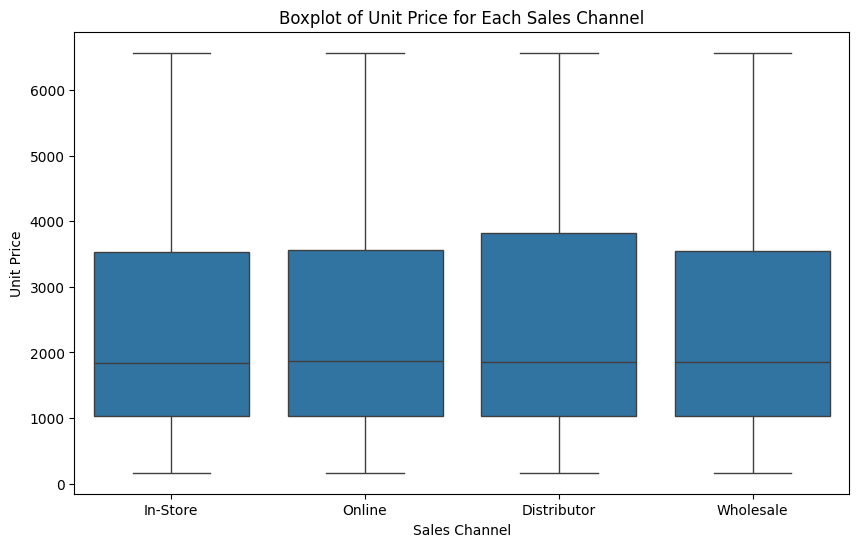

In [ ]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='Sales Channel', y='Unit Price', data=df)

# Adding title and labels
plt.title('Boxplot of Unit Price for Each Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Unit Price')

# Display the plot
plt.show()

In [ ]:
# Droping certain columns which wont be needed for ML
df  = df.drop(columns='OrderNumber')
df  = df.drop(columns='CurrencyCode')

In [ ]:
#we have two columns with categorical data in it, we will further encode it
print('Categories in Sales channel: \n\n',df['Sales Channel'].unique(),'\n\n\n\n')

print('Categories in WarehouseCode: \n\n',df['WarehouseCode'].unique())




Categories in Sales channel: 

 ['In-Store' 'Online' 'Distributor' 'Wholesale'] 




Categories in WarehouseCode: 

 ['WARE-UHY1004' 'WARE-NMK1003' 'WARE-PUJ1005' 'WARE-XYS1001'
 'WARE-MKL1006' 'WARE-NBV1002']


In [ ]:

# Encoding the categorical values
encode = LabelEncoder()
df['Sales Channel'] = encode.fit_transform(df['Sales Channel'])
df['WarehouseCode'] = encode.fit_transform(df['WarehouseCode'])
df


,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,1,4,311217,31518,14618,19618,6,15,259,12,5,0.075,1001.18,1963.1
1,2,2,311217,31518,22618,2718,14,20,196,27,3,0.075,3348.66,3939.6
2,0,4,311217,31518,21618,1718,21,16,213,16,1,0.050,781.22,1775.5
3,3,2,311217,31518,2618,7618,28,48,107,23,8,0.075,1464.69,2324.9
4,0,2,10418,31518,16618,26618,22,49,111,26,8,0.100,1476.14,1822.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,1,0,26920,301220,7121,14121,9,41,339,29,1,0.075,121.94,234.5
7987,2,2,26920,301220,2121,4121,14,29,202,3,6,0.050,1921.56,3202.6
7988,2,4,26920,301220,23121,26121,14,32,241,35,5,0.200,2792.76,3825.7
7989,2,2,26920,301220,20121,25121,20,42,112,36,8,0.100,804.00,1072.0


In [ ]:
# Now the data is all set for Machine Learning!

# Found a relation between the features
df['Total Sales'] = df['Order Quantity'] * df['Unit Price']



# Since we created a new column, we'll drop the older ones
df = df.drop(columns=['Order Quantity','Unit Price'])


In [ ]:
# Split training & testing data
X = df.drop(columns = 'Total Sales')
Y = df['Total Sales']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [ ]:
 #creating the model,we can change the parameters
model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,learning_rate=0.01)

In [ ]:

# Fit the model to the training data
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)


In [ ]:
# Calculate mean squared error
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 52822195.05041525


In [ ]:
type(model)

xgboost.sklearn.XGBRegressor

4

'Shweta'